In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date)\
                .order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

2017-08-23
2016-08-23
<class 'str'>


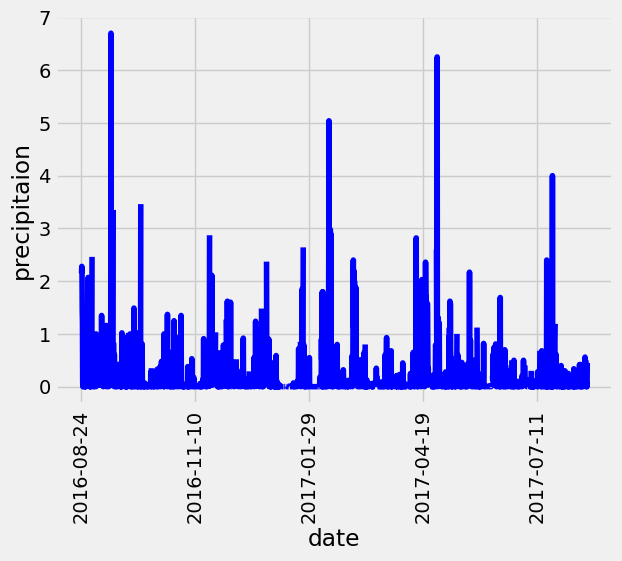

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recent_date = "2017-08-23"

# Calculate the date one year from the last date in data set.
new_date = dt.datetime.strptime(recent_date, '%Y-%m-%d').date()
print(new_date)
calculated_date= str(new_date - dt.timedelta(days = 365))
print (calculated_date)
print (type(calculated_date))

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date,Measurement.prcp).\
                    filter(Measurement.date> "2016-08-23")

# Save the query results as a Pandas DataFrame. Explicitly set the column names



prcp_df = pd.DataFrame(prcp_scores, columns=["date", "prcp"])
prcp_df.set_index("date", inplace = True)
prcp_df

# Sort the dataframe by date
prcp_sort_df = prcp_df.sort_values("date")
prcp_sort_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_sort_df["prcp"].plot( color = "blue")
plt.xticks(rotation = "vertical")
plt.xlabel("date")
plt.ylabel("precipitaion")
plt.grid(True)
plt.tight_layout
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_sort_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
stations_tot = session.query(Station.name).count()
stations_tot

9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activestation = session.query(Measurement.station,func.count(Measurement.station))\
                .group_by(Measurement.station)\
                .order_by(func.count(Measurement.station).desc()).all()
activestation

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(\
                func.min(Measurement.tobs),
                func.max(Measurement.tobs),
                func.avg(Measurement.tobs))\
                .filter(Measurement.station == 'USC00519281').all()
temperature

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

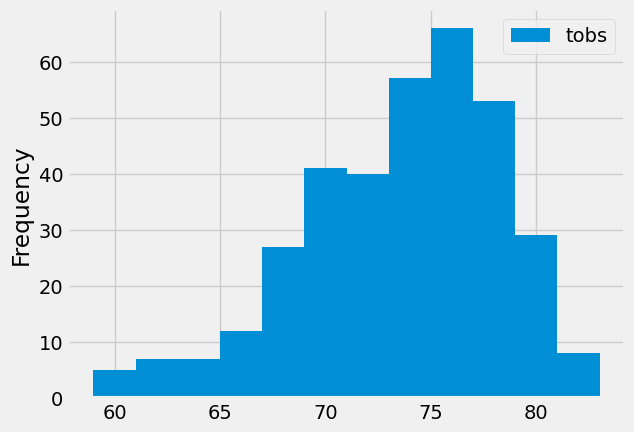

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps12_df = pd.DataFrame(session.query(Measurement.tobs)\
            .filter(Measurement.station == 'USC00519281')\
            .filter(Measurement.date >= "2016-08-23").all(),
            columns=['tobs'])
temps12_df.plot.hist(bins = 12)

# Close Session

In [30]:
# Close Session
session.close()
